## **Exploring Media Coverage of Climate Change**


DIGHUM 100 | Dr. Anderson | Shruti Natarajan 

### I. Project Introduction: 
Climate change and environmental issues have gained much more attention from the public over the last several decades.  For this project, I wanted to explore how climate change information is expressed and received from various news outlets.  

###II. Research Questions: 
1. What topics and questions are most frequently being discussed in major news sources regarding climate change? 
2. What sentiments do the media have towards this issue? 
3. How much are different countries discussing climate change in their media relative to the United States?  

###III. Datasets and Tools: 
1. Global Warming News Articles from A Dataset for Information Spreading over the News by Abdul Sittar, Dunja Mladenic, and Tomaz Erjavec.  
Link to this dataset: https://zenodo.org/record/3950065#.YN62fOjYrrc

2. Dataset for Newspaper Articles on Climate Change since 2000 
Link to this dataset: https://search.datacite.org/works/10.25810/c862-0e81


Methods Used: 
1. Overview Docs
2. matplotlib
3. LDA Topic Modelling 






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Now uploading the datasets: 


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [30]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('GlobalWarming - Metadata').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
#print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)

,0,1,2,3,4,5,6,7,8
0,Language+ID,Event,Weight,Class,Target,Source,Publishing Time,Website,Article url
1,English1,Global Warming (en),0.226,Information-Not-Propagated,New bugs- found in Kenya- can help to control ...,Nigeria Sun,2020-4-29T7:35:00Z,nigeriasun.com,https://www.nigeriasun.com/news/264880895/new-...
2,English10,Global Warming (en),0.284,Information-Not-Propagated,Billie Eilish & Finneas Perform Live Acoustic ...,American Songwriter,2020-4-29T6:18:00Z,americansongwriter.com,https://americansongwriter.com/billie-eilish-f...
3,English100,Global Warming (en),0.386,Information-Not-Propagated,Pruitt guts EPA science panels- will appoint n...,Jim Roberts Realty,2017-10-31T23:54:00Z,dothaneagle.com,http://www.dothaneagle.com/news/ap/business/pr...
4,English101,Global Warming (en),0.353,Information-Not-Propagated,Earth to overshoot global warming targets- U.N...,Yahoo,2017-10-31T23:34:00Z,yahoo.com,https://www.yahoo.com/news/apos-track-blow-pas...
...,...,...,...,...,...,...,...,...,...
1941,Spanish95,Global Warming (sp),0.336,Information-Not-Propagated,La Gran Barrera australiana sufre una reducció...,EL PAÍS,2019-04-03T17:04:00Z,elpais.com,https://elpais.com/elpais/2019/04/03/ciencia/1...
1942,Spanish96,Global Warming (sp),0.221,Information-Not-Propagated,La Teledetección en la Caracterización del Rég...,The Open University,2019-03-18T17:04:00Z,oro.open.ac.uk,http://oro.open.ac.uk/59612/
1943,Spanish97,Global Warming (sp),0.33,Information-Not-Propagated,El grupo del 3%: qué piensan los científicos e...,Ambito,2019-03-09T03:09:00Z,ambito.com,https://www.ambito.com/el-grupo-del-3-que-pien...
1944,Spanish98,Global Warming (sp),0.386,Information-Not-Propagated,Las mujeres son la clave para poner freno al c...,CNN Español,2019-03-09T01:39:00Z,cnnespanol.cnn.com,https://cnnespanol.cnn.com/2019/03/08/las-muje...


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('newspaper_countries_data').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)

[['Country', '2000', '2005', '2010', '2015', '2020'], ['USA', '941', '1494', '2563', '3516', '6235'], ['Japan', '2640', '4355', '5458', '2970', '3292'], ['UK ', '1463', '3933', '6440', '9306', '10983'], ['Sweden ', '124', '179', '311', '452', '874'], ['India', '182', '599', '2825', '3677', '3788'], ['Spain ', '459', '1104', '1089', '1412', '2312'], ['Russia ', '28', '169', '328', '212', '316']]


,0,1,2,3,4,5
0,Country,2000,2005,2010,2015,2020
1,USA,941,1494,2563,3516,6235
2,Japan,2640,4355,5458,2970,3292
3,UK,1463,3933,6440,9306,10983
4,Sweden,124,179,311,452,874
5,India,182,599,2825,3677,3788
6,Spain,459,1104,1089,1412,2312
7,Russia,28,169,328,212,316


### IV. Data Analysis
A. Common Words: The actual news articles are .txt files stored in a folder. I passed them through Overview Docs to see commonly mentioned words. Here are the results: 

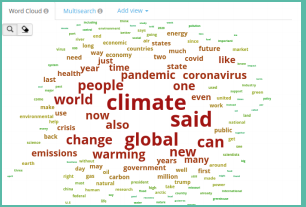








B. Country Newspaper Comparison: The frequency at which different countries publish newspaper articles about climate change may be indicative of the overall sentiment towards the issue. We have datasets of the quantity of climate-change related articles from different publishing companies from the UK, India, Russia, Japan, Spain, and Sweden. I manually compressed the data into a spreadsheet that counts the number of climate change discussions in the years 2000, 2005, 2010, 2015, and 2020. Let's turn this into a graph using matplotlib. 

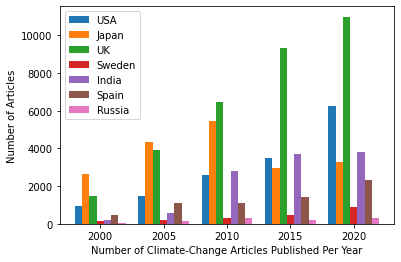

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['2000', '2005', '2010', '2015', '2020']
usa =  [941, 1494, 2563, 3516, 6235]
japan = [2640, 4355, 5458, 2970, 3292]
UK = [1463, 3933, 6440, 9306, 10983]
sweden = [124, 179, 311, 452, 874]
india = [182, 599, 2825, 3677, 3788]
spain = [459, 1104, 1089, 1412, 2312]
russia = [28, 169, 328, 212, 316]

x = np.arange(len(labels))
width = 0.8 

fig, ax = plt.subplots()
rects1 = ax.bar(x-3*(width/7), usa, width/7, label='USA')
rects2 = ax.bar(x - 2*(width/7), japan, width/7, label = "Japan")
rects3 = ax.bar(x - 1*(width/7), UK, width/7, label = "UK")
rects4 = ax.bar(x - 0*(width/7), sweden, width/7, label = "Sweden")
rects5 = ax.bar(x + 1*(width/7), india, width/7, label = "India")
rects6 = ax.bar(x + 2*(width/7), spain, width/7, label = "Spain")
rects7 = ax.bar(x + 3*(width/7), russia, width/7, label = "Russia")

ax.set_ylabel("Number of Articles")
ax.set_xlabel("Number of Climate-Change Articles Published Per Year")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()




plt.show() 





D. LDA on news article titles: What are some of the general or standout topics being discussed? I manually imported twenty random papers from the set of 1000 into a spreadsheet to analyze using LDA topic analysis. 

In [ ]:
#first import csv file. 
import pandas as pd
import os

os.chdir('..')

# Read data into papers
papers = pd.read_csv('./home/twenty_random_papers.csv')

# Print head
papers.head()


,paper_number,paper_text
0,1,Insect pests- such as maize stemborers and fal...
1,2,Last week on April 22 the world marked the 50t...
2,55,Mandatory lockdowns imposed by many government...
3,86,A record-breaking ozone hole that formed over ...
4,102,Watch our editor-in-chief Koert Debeuf explain...


In [ ]:
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    insect pests- such as maize stemborers and fal...
1    last week on april 22 the world marked the 50t...
2    mandatory lockdowns imposed by many government...
3    a record-breaking ozone hole that formed over ...
4    watch our editor-in-chief koert debeuf explain...
Name: paper_text_processed, dtype: object

In [ ]:
#Now is analysis! 

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['insect', 'pests', 'maize', 'stemborers', 'fall', 'armyworm', 'increasingly', 'challenge', 'food', 'production', 'around', 'world', 'huge', 'demands', 'crops', 'meant', 'agricultural', 'systems', 'simplified', 'frequently', 'focused', 'single', 'crops', 'fields', 'full', 'single', 'crop', 'easily', 'found', 'insect']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 3), (3, 9), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 9), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 6), (29, 1)]


In [ ]:
#Now we briefly train the model. 

from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"new" + 0.004*"said" + 0.004*"one" + 0.003*"year" + 0.003*"soil" + '
  '0.003*"johnson" + 0.003*"global" + 0.003*"also" + 0.003*"warming" + '
  '0.002*"climate"'),
 (1,
  '0.004*"said" + 0.004*"ozone" + 0.004*"new" + 0.004*"oil" + 0.004*"one" + '
  '0.004*"also" + 0.003*"global" + 0.003*"pandemic" + 0.003*"last" + '
  '0.002*"coronavirus"'),
 (2,
  '0.005*"energy" + 0.004*"oil" + 0.004*"bitcoin" + 0.003*"johnson" + '
  '0.003*"mining" + 0.003*"new" + 0.003*"rotten" + 0.003*"one" + '
  '0.003*"pollution" + 0.003*"global"'),
 (3,
  '0.006*"said" + 0.005*"global" + 0.004*"new" + 0.004*"warming" + '
  '0.004*"would" + 0.003*"world" + 0.003*"one" + 0.003*"also" + 0.003*"hagel" '
  '+ 0.003*"could"'),
 (4,
  '0.006*"said" + 0.005*"ozone" + 0.004*"pandemic" + 0.004*"new" + '
  '0.003*"global" + 0.003*"climate" + 0.003*"tomatoes" + 0.003*"world" + '
  '0.003*"synopsis" + 0.003*"johnson"'),
 (5,
  '0.006*"oil" + 0.005*"said" + 0.004*"industry" + 0.004*"rotten" + '
  '0.004*"new" +

Analysis: "pandemic", "coronavirus", "oil", and "trump" were severable notable topics being discussed commonly among the sampled articles. It appears that within the last year, many news articles were discussing the effect of the pandemic on climate change, which is very relevant to current times. In addition, it is expected that former president Trump would be discussed, as his policies and statements typically worked against fighting climate change - this would mean his name would circulate more in climate change news articles. 

V. Limitations 
There were several limitations to this project. 
1. English only articles - for the sake of performing analyses, I opted to use only English articles out of my dataset, while much useful data might have been gathered from articles in other languages. 
2. The climate change news articles published per year, although several news sources (most popular ones) were included in each dataset, there were likely other newspaper sources that were neglected. In addition, this dataset only looked at newspaper as opposed to television transcripts or other media sources, which might have provided a different view. 
3. Due to the very large size of English climate change articles in my dataset, I had to randomly and evenly sample papers as opposed to performing the LDA analysis on all of them. Given the time, I would have tried to import all 1000 papers into the spreadsheet to analyze topics from all of them. 
4. In general, many other ways climate change is being discussed (ex. social media) were neglected in this project, which would have provided major insight. 

In the future, I would like to analyze more papers, and apply matplotlib to data collected on sources other than newspaper articles.

VI. Citations for Tutorials 

 
1. https://github.com/kapadias
2. https://www.nltk.org/book/ch01.html
3. https://pythonprogramming.net/sentiment-analysis-python-textblob-vader/
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
